<a href="https://www.kaggle.com/code/pr4nav101/phishing-website-detection-cnn-lstm?scriptVersionId=156263760" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [155]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay

## LOADING DATASET

In [156]:
df = pd.read_csv('/kaggle/input/web-page-phishing-detection-dataset/dataset_phishing.csv')
df.head(10)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
5,http://appleid.apple.com-app.es/,32,24,0,3,1,0,0,0,0,...,1,1,1,0,-1,0,0,1,0,phishing
6,http://www.mutuo.it,19,12,0,2,0,0,0,0,0,...,0,1,0,170,7529,0,0,0,1,legitimate
7,http://www.shadetreetechnology.com/V4/validati...,81,27,1,2,0,0,0,0,0,...,1,0,0,76,5767,0,0,1,2,phishing
8,http://vamoaestudiarmedicina.blogspot.com/,42,34,0,2,0,0,0,0,0,...,1,1,0,371,7298,0,0,0,5,legitimate
9,https://parade.com/425836/joshwigler/the-amazi...,104,10,0,1,10,0,0,0,0,...,1,0,0,128,9368,6774,0,0,5,legitimate


In [157]:
#label Encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['labels'] = le.fit_transform(df['status'])

In [158]:
df[['status','labels']].head(10)

,status,labels
0,legitimate,0
1,phishing,1
2,phishing,1
3,legitimate,0
4,legitimate,0
5,phishing,1
6,legitimate,0
7,phishing,1
8,legitimate,0
9,legitimate,0


In [159]:
Y1 = df['labels']
X1 = df.drop(columns = ['url','labels','status'])

In [160]:
X1.head(2)

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,37,19,0,3,0,0,0,0,0,0,...,0,0,1,0,45,-1,0,1,1,4
1,77,23,1,1,0,0,0,0,0,0,...,0,1,0,0,77,5767,0,0,1,2


In [161]:
Y1.head(2)

0    0
1    1
Name: labels, dtype: int64

In [162]:
#data for learning without features 

X2 = df['url']
X2.head(2)

0                http://www.crestonwood.com/router.php
1    http://shadetreetechnology.com/V4/validation/a...
Name: url, dtype: object

## CREATING DATASET WITH PRIOR FEATURE EXTRACTION

In [163]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X1,Y1,stratify = Y1,test_size = 0.2,random_state = 42)

In [164]:
X_train1 = np.expand_dims(X_train1, axis=-1)
X_test1 = np.expand_dims(X_test1, axis=-1)

X_train1.shape

(9144, 87, 1)

## CREATING DATASET WITHOUT PRIOR FEATURE EXTRACTION

In [165]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [166]:
ps = PorterStemmer()
corpus_train = []

def albumentations(X,corpus_t):
    for i in range(len(X)):
        print(i,"/",len(X))
        review = re.sub("[^a-zA-Z]"," ",X[i])
        review = review.lower()
        review = review.split()
        review = [ps.stem(word) for word in review if word not in set(stopwords.words("english"))] #TO REMOVE STOP WORDS LIKE THE, A ETC 
        review = " ".join(review)
        corpus_t.append(review)
albumentations(X2,corpus_train)

0 / 11430
1 / 11430
2 / 11430
3 / 11430
4 / 11430
5 / 11430
6 / 11430
7 / 11430
8 / 11430
9 / 11430
10 / 11430
11 / 11430
12 / 11430
13 / 11430
14 / 11430
15 / 11430
16 / 11430
17 / 11430
18 / 11430
19 / 11430
20 / 11430
21 / 11430
22 / 11430
23 / 11430
24 / 11430
25 / 11430
26 / 11430
27 / 11430
28 / 11430
29 / 11430
30 / 11430
31 / 11430
32 / 11430
33 / 11430
34 / 11430
35 / 11430
36 / 11430
37 / 11430
38 / 11430
39 / 11430
40 / 11430
41 / 11430
42 / 11430
43 / 11430
44 / 11430
45 / 11430
46 / 11430
47 / 11430
48 / 11430
49 / 11430
50 / 11430
51 / 11430
52 / 11430
53 / 11430
54 / 11430
55 / 11430
56 / 11430
57 / 11430
58 / 11430
59 / 11430
60 / 11430
61 / 11430
62 / 11430
63 / 11430
64 / 11430
65 / 11430
66 / 11430
67 / 11430
68 / 11430
69 / 11430
70 / 11430
71 / 11430
72 / 11430
73 / 11430
74 / 11430
75 / 11430
76 / 11430
77 / 11430
78 / 11430
79 / 11430
80 / 11430
81 / 11430
82 / 11430
83 / 11430
84 / 11430
85 / 11430
86 / 11430
87 / 11430
88 / 11430
89 / 11430
90 / 11430
91 / 1143

In [167]:
corpus_train[:4]

['http www crestonwood com router php',
 'http shadetreetechnolog com v valid aedc ae eabcfa e',
 'http support appleld com secureupd duilawyeryork com ap e b b b cmd updat dispatch e b b b b local',
 'http rgipt ac']

In [168]:
cv =TfidfVectorizer(max_features = 1000)
X2 = cv.fit_transform(corpus_train).toarray()

In [169]:
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X2,Y1,stratify = Y1,test_size = 0.2,random_state = 42)

In [170]:
X_train2 = np.expand_dims(X_train2, axis = -1)
X_test2 = np.expand_dims(X_test2, axis = -1)
print(X_train2.shape,Y_train2.shape)
print(X_test2.shape,Y_test2.shape)

(9144, 1000, 1) (9144,)
(2286, 1000, 1) (2286,)


In [171]:
input_size1 = X_train1[1].shape
input_size2 = X_train2[2].shape
input_size1,input_size2

((87, 1), (1000, 1))

## Evaluation Helper Functions

In [172]:
def eval_graph(results):

    acc = results.history['accuracy']
    val_acc = results.history['val_accuracy']
    epochs = range(len(acc))
    fig = plt.figure(figsize=(14,7))
    plt.plot(epochs,acc,'r',label="Training Accuracy")
    plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
    plt.legend(loc='upper left')
    plt.title("ACCURACY GRAPH")
    plt.show()
    
    loss = results.history['loss']
    val_loss = results.history['val_loss']
    epochs = range(len(loss))
    fig = plt.figure(figsize=(14,7))
    plt.plot(epochs,loss,'r',label="Training loss")
    plt.plot(epochs,val_loss,'b',label="Validation loss")
    plt.legend(loc='upper left')
    plt.title("LOSS GRAPH")
    plt.show()


In [173]:
def conf_matrix(X_test,Y_test,model):
    
    Y_pred = model.predict(X_test)
    Y_pred = Y_pred>0.5
    cm = confusion_matrix(Y_test,Y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap = plt.cm.YlGn)
    plt.title('CONFUSION MATRIX')
    plt.show()

## CNN MODEL

In [174]:
from keras import Sequential

def CNN(input_size):

    model = keras.Sequential()
    model.add(layers.Input(input_size))
    model.add(layers.Conv1D(filters = 16,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 32,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 64,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 128,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 256,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(512,activation = 'relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1,activation = 'sigmoid'))
    
    return model

CNN_model1 = CNN(input_size1)
CNN_model2 = CNN(input_size2)
CNN_model1.summary()
CNN_model2.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_210 (Conv1D)         (None, 87, 16)            64        
                                                                 
 dropout_302 (Dropout)       (None, 87, 16)            0         
                                                                 
 batch_normalization_210 (B  (None, 87, 16)            64        
 atchNormalization)                                              
                                                                 
 max_pooling1d_210 (MaxPool  (None, 44, 16)            0         
 ing1D)                                                          
                                                                 
 conv1d_211 (Conv1D)         (None, 44, 32)            1568      
                                                                 
 dropout_303 (Dropout)       (None, 44, 32)          

## CNN MODEL ON FIRST DATASET

In [175]:
CNN_model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

callbacks = [tf.keras.callbacks.ModelCheckpoint('CNN_MODEL_ON_FEATURE_EXTRACTED.h5',verbose=1,save_best_only=True),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001,patience=30,verbose=1)]
CNN_results_1 = CNN_model1.fit(X_train1,Y_train1,validation_split=0.2,batch_size=128,epochs=200,callbacks=callbacks)

Epoch 1/200
54/58 [==========================>...] - ETA: 0s - loss: 0.7771 - accuracy: 0.6418
Epoch 1: val_loss improved from inf to 0.71657, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 6s 17ms/step - loss: 0.7760 - accuracy: 0.6431 - val_loss: 0.7166 - val_accuracy: 0.4910
Epoch 2/200
12/58 [=====>........................] - ETA: 0s - loss: 0.6791 - accuracy: 0.6764

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


54/58 [==========================>...] - ETA: 0s - loss: 0.5979 - accuracy: 0.7160
Epoch 2: val_loss improved from 0.71657 to 0.71064, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 1s 12ms/step - loss: 0.5943 - accuracy: 0.7178 - val_loss: 0.7106 - val_accuracy: 0.5232
Epoch 3/200
55/58 [===========================>..] - ETA: 0s - loss: 0.5196 - accuracy: 0.7574
Epoch 3: val_loss did not improve from 0.71064
58/58 [==============================] - 1s 11ms/step - loss: 0.5172 - accuracy: 0.7589 - val_loss: 0.7712 - val_accuracy: 0.5249
Epoch 4/200
55/58 [===========================>..] - ETA: 0s - loss: 0.4681 - accuracy: 0.7832
Epoch 4: val_loss did not improve from 0.71064
58/58 [==============================] - 1s 11ms/step - loss: 0.4687 - accuracy: 0.7829 - val_loss: 0.7868 - val_accuracy: 0.4970
Epoch 5/200
58/58 [==============================] - ETA: 0s - loss: 0.4528 - accuracy: 0.7951
Epoch 5: val_loss improved from 0.71064 to 0.7

In [176]:
CNN_model1.evaluate(X_test1,Y_test1,verbose = 1)

72/72 [==============================] - 0s 3ms/step - loss: 0.2967 - accuracy: 0.8705


[0.2967459261417389, 0.8705161809921265]

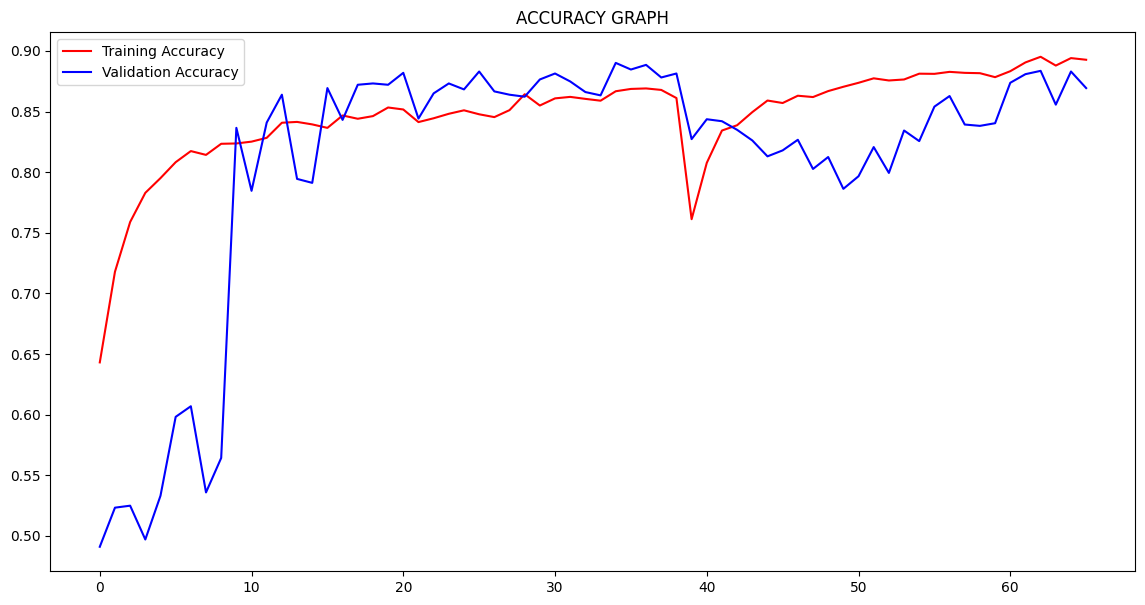

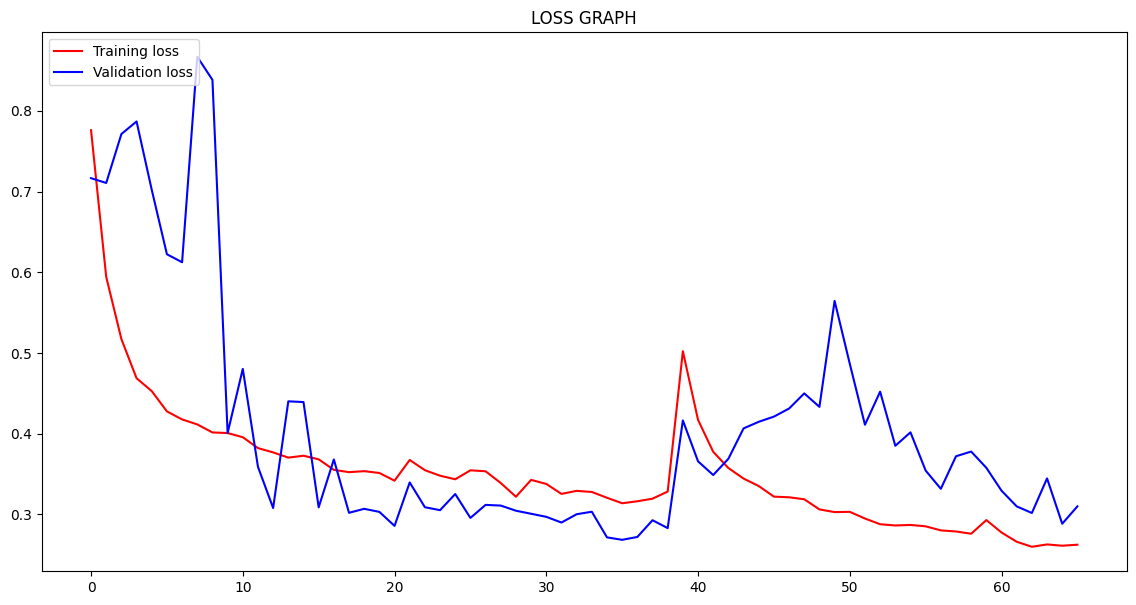

In [180]:
eval_graph(CNN_results_1)

In [178]:
Y_test1

6172    1
9810    1
8537    1
605     1
6549    0
       ..
4104    0
6374    0
6232    0
3950    0
8863    0
Name: labels, Length: 2286, dtype: int64

72/72 [==============================] - 0s 2ms/step


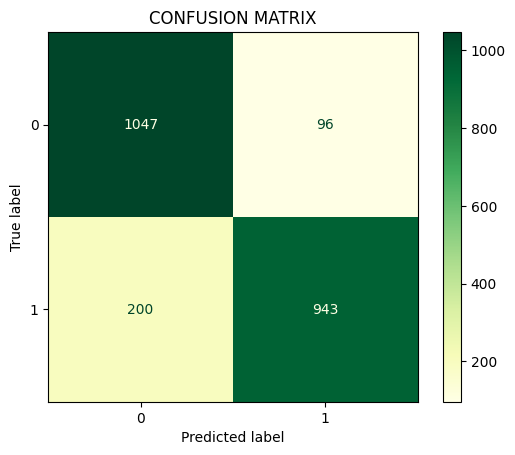

In [179]:
conf_matrix(X_test1,Y_test1,CNN_model1)

## CNN MODEL ON SECOND DATASET

In [181]:
CNN_model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

callbacks = [tf.keras.callbacks.ModelCheckpoint('CNN_MODEL_ON_NON_FEATURE_EXTRACTED.h5',verbose=1,save_best_only=True),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001,patience=30,verbose=1)]
CNN_results_2 = CNN_model2.fit(X_train2,Y_train2,validation_split=0.2,batch_size=128,epochs=200,callbacks=callbacks)

Epoch 1/200
58/58 [==============================] - ETA: 0s - loss: 0.9759 - accuracy: 0.7204
Epoch 1: val_loss improved from inf to 0.69141, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 7s 29ms/step - loss: 0.9759 - accuracy: 0.7204 - val_loss: 0.6914 - val_accuracy: 0.5036
Epoch 2/200
 1/58 [..............................] - ETA: 0s - loss: 0.4869 - accuracy: 0.7812

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


57/58 [============================>.] - ETA: 0s - loss: 0.4522 - accuracy: 0.7962
Epoch 2: val_loss improved from 0.69141 to 0.68865, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 1s 19ms/step - loss: 0.4528 - accuracy: 0.7959 - val_loss: 0.6886 - val_accuracy: 0.5036
Epoch 3/200
57/58 [============================>.] - ETA: 0s - loss: 0.4009 - accuracy: 0.8198
Epoch 3: val_loss improved from 0.68865 to 0.67576, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 1s 18ms/step - loss: 0.4008 - accuracy: 0.8197 - val_loss: 0.6758 - val_accuracy: 0.5041
Epoch 4/200
57/58 [============================>.] - ETA: 0s - loss: 0.3610 - accuracy: 0.8459
Epoch 4: val_loss improved from 0.67576 to 0.65970, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 1s 18ms/step - loss: 0.3619 - accuracy: 0.8454 - val_loss: 0.6597 - val_accuracy: 0.6670
Epoch 5/200
57/58 [============

In [182]:
CNN_model2.evaluate(X_test2,Y_test2,verbose = 1)

72/72 [==============================] - 0s 4ms/step - loss: 0.2971 - accuracy: 0.9143


[0.29710978269577026, 0.914260745048523]

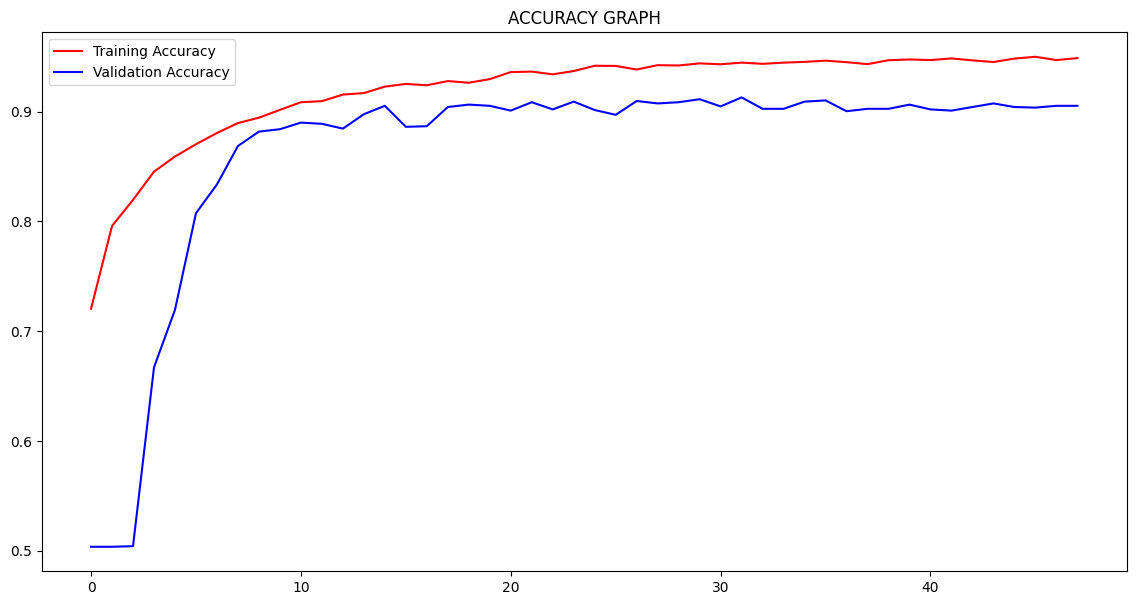

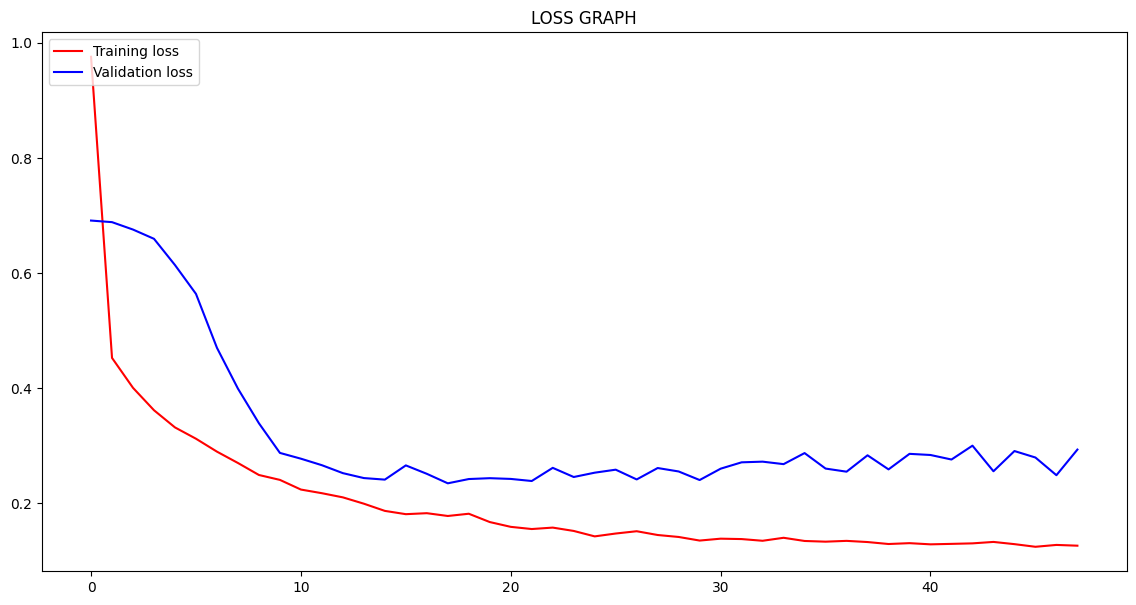

72/72 [==============================] - 0s 2ms/step


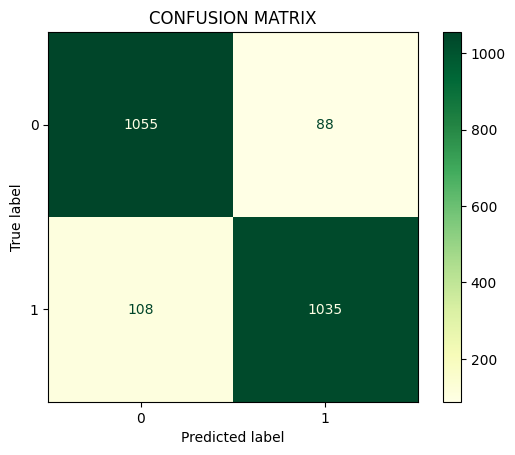

In [183]:
eval_graph(CNN_results_2)
conf_matrix(X_test2,Y_test2,CNN_model2)

## CNN LSTM MODEL

In [199]:
def CNN_LSTM(input_size):
    model = keras.Sequential()
    model.add(layers.Input(input_size))
    model.add(layers.Conv1D(filters = 16,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 32,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 64,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 128,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 256,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.LSTM(128,return_sequences=True))
    model.add(layers.Dropout(0.3))
    model.add(layers.Flatten())
    model.add(layers.Dense(128,activation = 'relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(128,activation = 'relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1,activation = 'sigmoid'))
    
    return model

CNN_LSTM_model1 = CNN_LSTM(input_size1)
CNN_LSTM_model1.summary()
CNN_LSTM_model2 = CNN_LSTM(input_size2)    
CNN_LSTM_model2.summary()

Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_281 (Conv1D)         (None, 87, 16)            64        
                                                                 
 dropout_417 (Dropout)       (None, 87, 16)            0         
                                                                 
 batch_normalization_281 (B  (None, 87, 16)            64        
 atchNormalization)                                              
                                                                 
 max_pooling1d_272 (MaxPool  (None, 44, 16)            0         
 ing1D)                                                          
                                                                 
 conv1d_282 (Conv1D)         (None, 44, 32)            1568      
                                                                 
 dropout_418 (Dropout)       (None, 44, 32)          

## CNN_LSTM MODEL ON FIRST DATASET

In [200]:
CNN_LSTM_model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

callbacks = [tf.keras.callbacks.ModelCheckpoint('CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5',verbose=1,save_best_only=True),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001,patience=30,verbose=1)]
CNN_LSTM_results_1 = CNN_LSTM_model1.fit(X_train1,Y_train1,validation_split=0.2,batch_size=128,epochs=200,callbacks=callbacks)

Epoch 1/200
56/58 [===========================>..] - ETA: 0s - loss: 0.6004 - accuracy: 0.6696
Epoch 1: val_loss improved from inf to 0.71803, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 9s 27ms/step - loss: 0.5995 - accuracy: 0.6710 - val_loss: 0.7180 - val_accuracy: 0.5227
Epoch 2/200
 6/58 [==>...........................] - ETA: 0s - loss: 0.5090 - accuracy: 0.7643

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


56/58 [===========================>..] - ETA: 0s - loss: 0.4733 - accuracy: 0.7847
Epoch 2: val_loss did not improve from 0.71803
58/58 [==============================] - 1s 12ms/step - loss: 0.4731 - accuracy: 0.7844 - val_loss: 1.0082 - val_accuracy: 0.5342
Epoch 3/200
56/58 [===========================>..] - ETA: 0s - loss: 0.4339 - accuracy: 0.8013
Epoch 3: val_loss did not improve from 0.71803
58/58 [==============================] - 1s 12ms/step - loss: 0.4338 - accuracy: 0.8015 - val_loss: 0.8418 - val_accuracy: 0.5347
Epoch 4/200
54/58 [==========================>...] - ETA: 0s - loss: 0.4106 - accuracy: 0.8229
Epoch 4: val_loss did not improve from 0.71803
58/58 [==============================] - 1s 13ms/step - loss: 0.4089 - accuracy: 0.8230 - val_loss: 1.5556 - val_accuracy: 0.5320
Epoch 5/200
58/58 [==============================] - ETA: 0s - loss: 0.3915 - accuracy: 0.8308
Epoch 5: val_loss did not improve from 0.71803
58/58 [==============================] - 1s 16ms/step 

72/72 [==============================] - 0s 4ms/step - loss: 0.2641 - accuracy: 0.9121


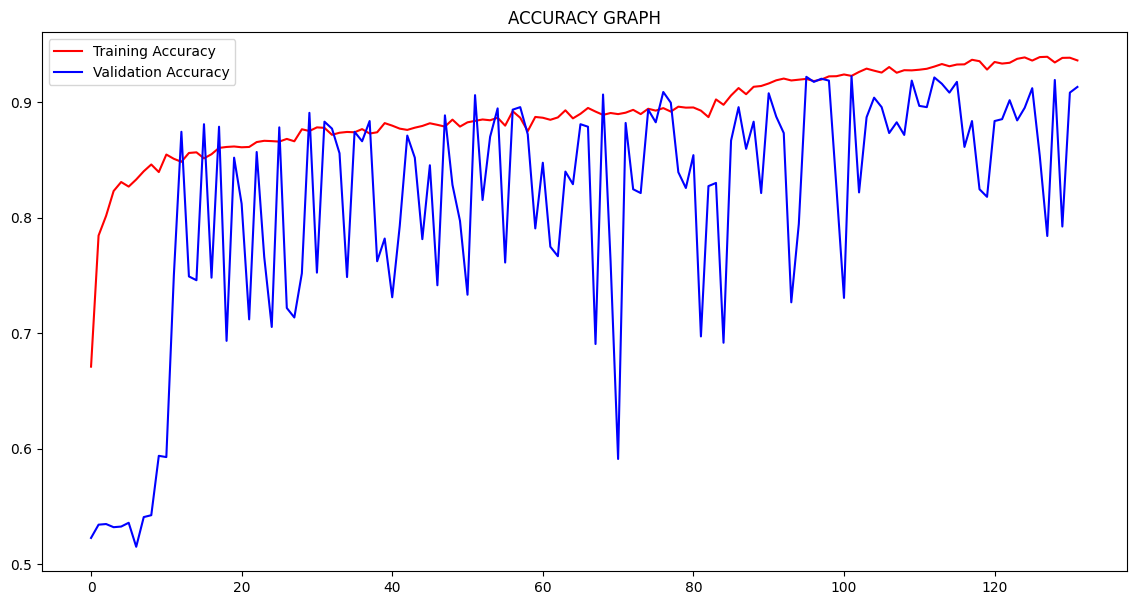

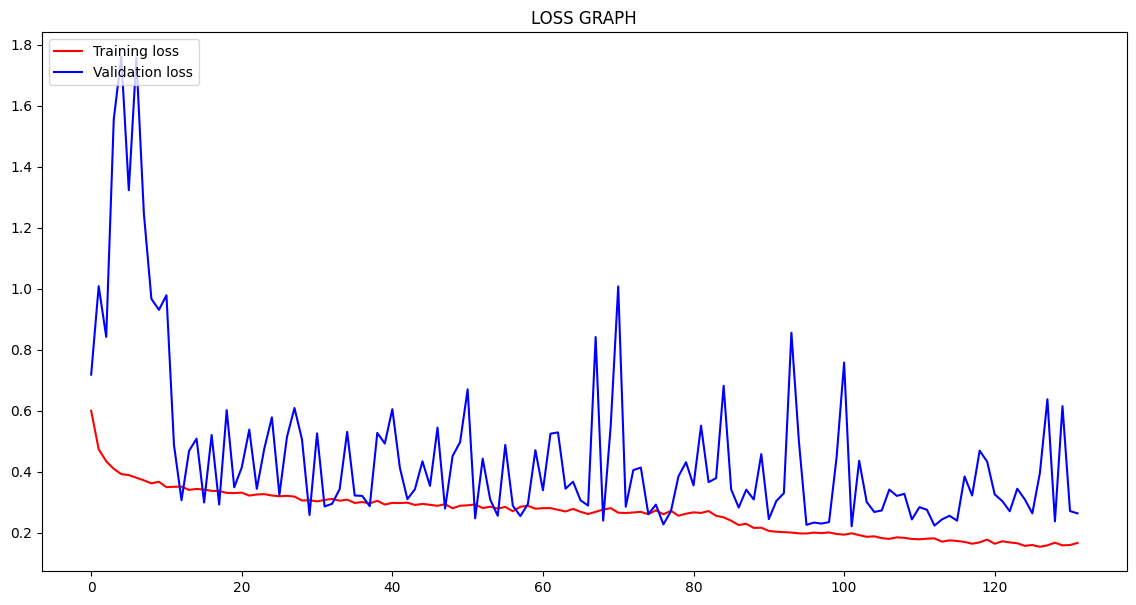

72/72 [==============================] - 0s 3ms/step


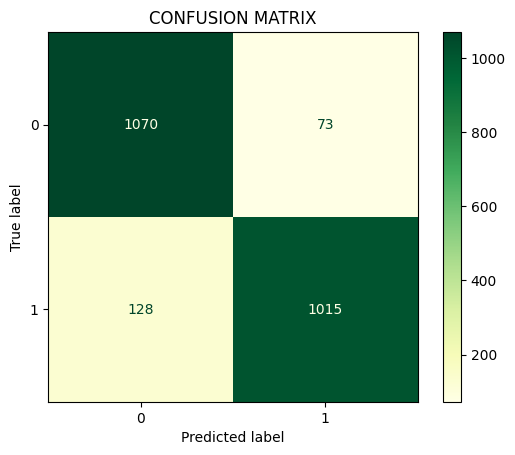

In [202]:
CNN_LSTM_model1.evaluate(X_test1,Y_test1)
eval_graph(CNN_LSTM_results_1)
conf_matrix(X_test1,Y_test1,CNN_LSTM_model1)

## CNN_LSTM MODEL ON SECOND DATASET

In [203]:
CNN_LSTM_model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

callbacks = [tf.keras.callbacks.ModelCheckpoint('CNN_LSTM_MODEL_ON_NON_FEATURE_EXTRACTED.h5',verbose=1,save_best_only=True),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001,patience=30,verbose=1)]
CNN_LSTM_results_2 = CNN_LSTM_model2.fit(X_train2,Y_train2,validation_split=0.2,batch_size=128,epochs=200,callbacks=callbacks)

Epoch 1/200
58/58 [==============================] - ETA: 0s - loss: 0.5372 - accuracy: 0.7275
Epoch 1: val_loss improved from inf to 0.69274, saving model to CNN_LSTM_MODEL_ON_NON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 9s 34ms/step - loss: 0.5372 - accuracy: 0.7275 - val_loss: 0.6927 - val_accuracy: 0.5036
Epoch 2/200
 4/58 [=>............................] - ETA: 1s - loss: 0.4540 - accuracy: 0.7910

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


58/58 [==============================] - ETA: 0s - loss: 0.4327 - accuracy: 0.8075
Epoch 2: val_loss did not improve from 0.69274
58/58 [==============================] - 1s 21ms/step - loss: 0.4327 - accuracy: 0.8075 - val_loss: 0.7220 - val_accuracy: 0.5036
Epoch 3/200
58/58 [==============================] - ETA: 0s - loss: 0.3820 - accuracy: 0.8357
Epoch 3: val_loss did not improve from 0.69274
58/58 [==============================] - 1s 21ms/step - loss: 0.3820 - accuracy: 0.8357 - val_loss: 0.7960 - val_accuracy: 0.5036
Epoch 4/200
58/58 [==============================] - ETA: 0s - loss: 0.3544 - accuracy: 0.8437
Epoch 4: val_loss improved from 0.69274 to 0.67948, saving model to CNN_LSTM_MODEL_ON_NON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 1s 23ms/step - loss: 0.3544 - accuracy: 0.8437 - val_loss: 0.6795 - val_accuracy: 0.5921
Epoch 5/200
58/58 [==============================] - ETA: 0s - loss: 0.3204 - accuracy: 0.8637
Epoch 5: val_loss improved from 0.679

72/72 [==============================] - 0s 5ms/step - loss: 0.3131 - accuracy: 0.9143


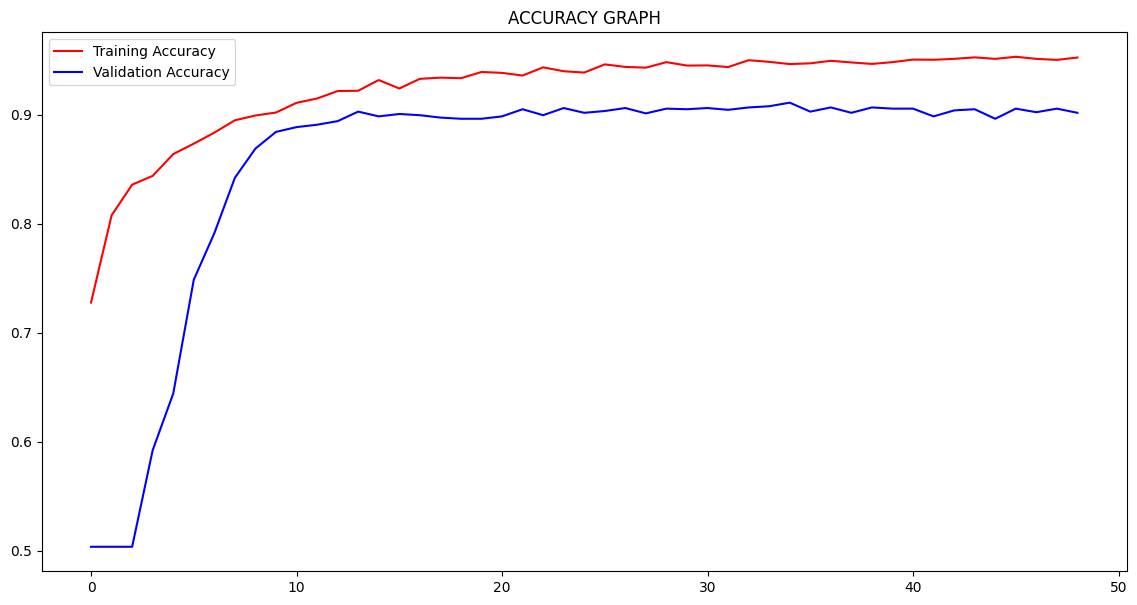

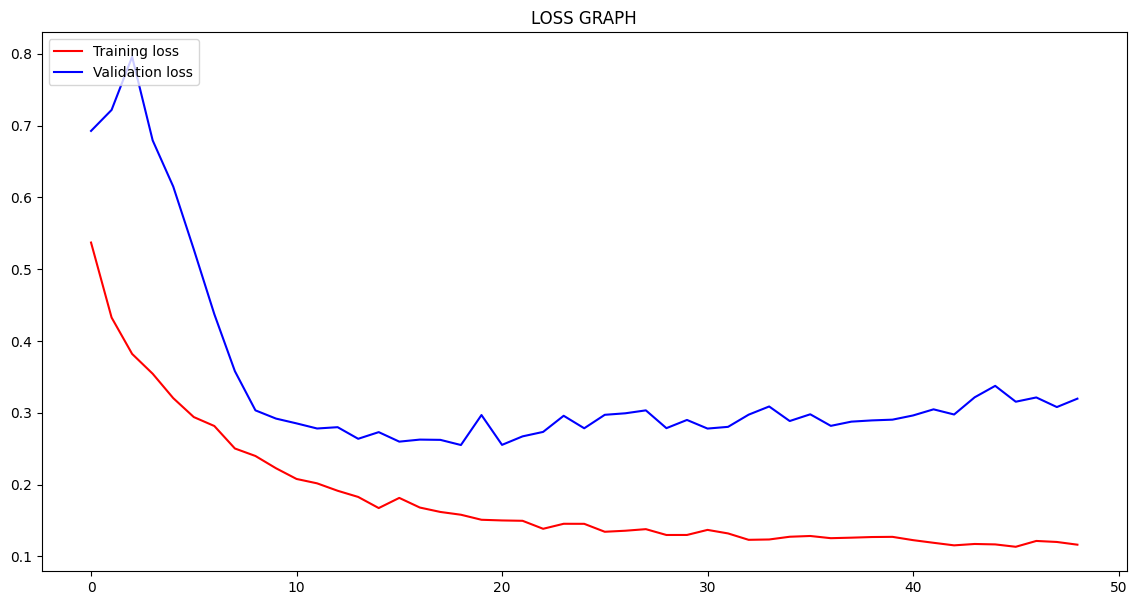

72/72 [==============================] - 1s 3ms/step


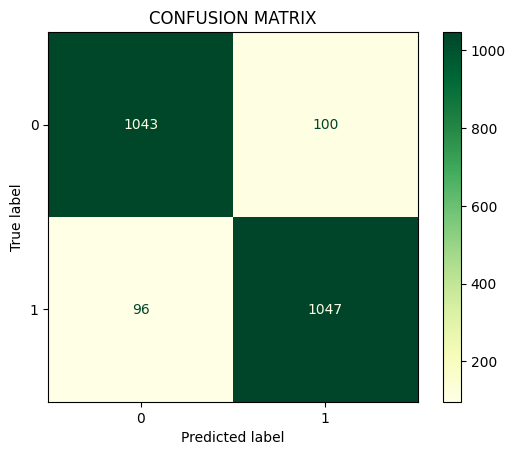

In [204]:
CNN_LSTM_model2.evaluate(X_test2,Y_test2)
eval_graph(CNN_LSTM_results_2)
conf_matrix(X_test2,Y_test2,CNN_LSTM_model2)